In [27]:
import numpy 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
import pathlib

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [29]:
X_train.shape

(60000, 28, 28)

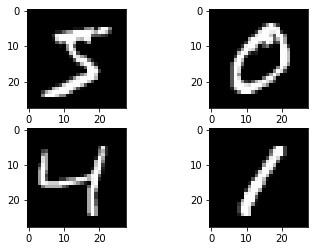

In [30]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [31]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [32]:
X_train.shape

(60000, 784)

In [33]:
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

In [34]:
# create model
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [35]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [36]:
# Training model
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=2, batch_size=200)

Epoch 1/2
300/300 [==============================] - 5s 14ms/step - loss: 0.0415 - val_loss: 0.0196
Epoch 2/2
300/300 [==============================] - 4s 13ms/step - loss: 0.0165 - val_loss: 0.0138


In [37]:
# Final evaluation of the model
pred = model.predict(x_test_noisy)

In [38]:
pred.shape

(10000, 784)

Test Images


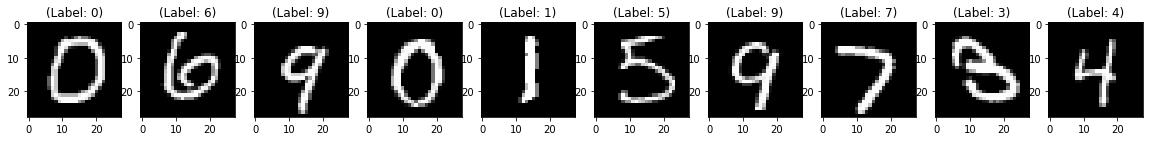

Test Images with Noise


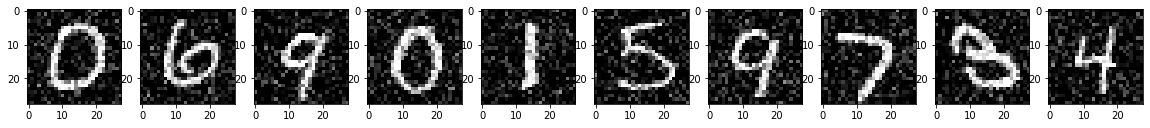

Reconstruction of Noisy Test Images


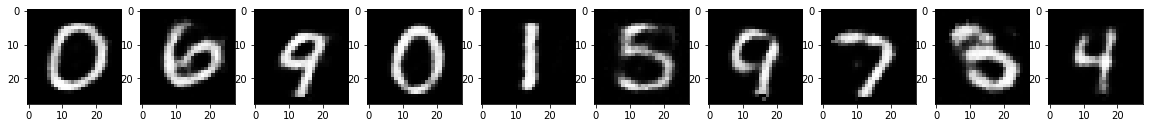

In [39]:
X_test = numpy.reshape(X_test, (10000,28,28)) *255
pred = numpy.reshape(pred, (10000,28,28)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i,:,:], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()

Test Images


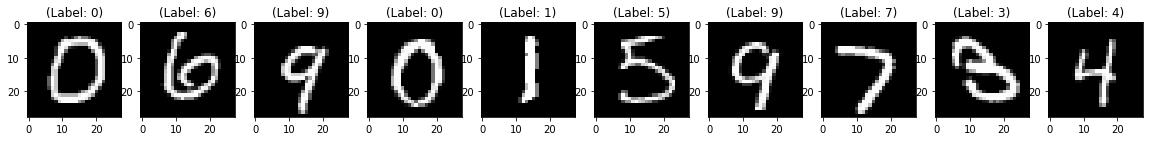

Test Images with Noise


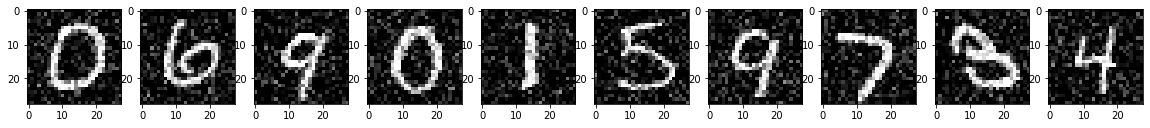

Reconstruction of Noisy Test Images


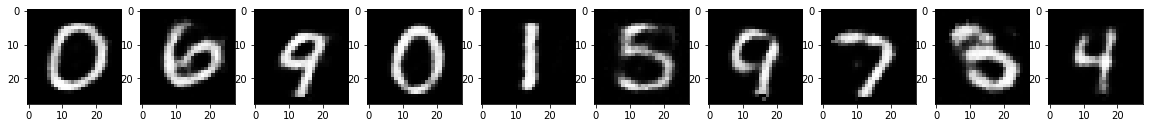

In [40]:
X_test = numpy.reshape(X_test, (10000,28,28)) *255
pred = numpy.reshape(pred, (10000,28,28)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i,:,:], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()

In [41]:
import pathlib
import numpy as np

root = pathlib.Path('C:\\Pre_trained\\noisy10')
img_paths = list(root.rglob("*.png*"))
img_paths_lst = [str(path) for path in img_paths]

noisy_array = np.asarray(img_paths_lst)

root = pathlib.Path('C:\\Pre_trained\\original')
img_paths = list(root.rglob("*.png*"))
img_paths_lst = [str(path) for path in img_paths]

org_array = np.asarray(img_paths_lst)

In [42]:
def get_images_in_mem(images_paths):
    images_lst = []
    for img_path in tqdm(images_paths):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (28, 28))
        images_lst.append(img)
    return np.array(images_lst)

In [43]:
from tqdm.notebook import tqdm
import cv2 
noisy_images = get_images_in_mem(noisy_array)
org_images = get_images_in_mem(org_array)

print(noisy_images.shape)
print(org_images.shape)


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

(25, 28, 28)
(25, 28, 28)


Reconstruction of Noisy Test Images


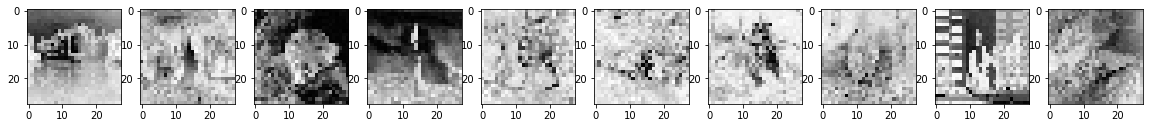

In [44]:
# X_test = numpy.reshape(X_test, (10000,28,28)) *255
pred = np.reshape(noisy_images, (25,28,28)) *255
# x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
# print("Test Images")
# for i in range(10,20,1):
#     plt.subplot(2, 10, i+1)
#     plt.imshow(X_test[i,:,:], cmap='gray')
#     curr_lbl = y_test[i]
#     plt.title("(Label: " + str(curr_lbl) + ")")
# plt.show()    
# plt.figure(figsize=(20, 4))
# print("Test Images with Noise")
# for i in range(10,20,1):
#     plt.subplot(2, 10, i+1)
#     plt.imshow(x_test_noisy[i,:,:], cmap='gray')
# plt.show()    
# plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()

In [45]:
import seaborn as sns 
import numpy as np 
import pandas as pd 
 
from sklearn.model_selection import train_test_split 
 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, Input 
from tensorflow.keras.utils import to_categorical 
%matplotlib inline 
sns.set(style = 'white', context = 'notebook', palette = 'deep') 
np.random.seed(42) 